In [1]:
#preprecess imports

import pandas as pd
import spacy
import numpy as np
import en_core_web_sm
# nlp = spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()
from tqdm.notebook import tqdm 

# Essentials
import base64
import re
from tqdm import tqdm
import numpy as np
import pandas as pd

# Gensim and LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this 

# NLP stuff
import contractions
import demoji
import string
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#nltk.download('wordnet')

# Plotting tools
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn 


[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/ugrad/nafis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('practice.csv')

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df = df.dropna(axis='rows')

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df.head()

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,pub_type,position_section,position_subsection,hl1,hl2,author,lede,body,language,word_count,copyright,content-id,volume,issue_number,edition,pub_name,pub_date,licensor_indexing_terms,indexing_terms
1,1,"Newspaper, Newspapers",SPORTS,Football-Patriots,Wilfork goes out a legend,Lineman leaves Pats for Texans,JEFF HOWE,Vince Wilfork will be immortalized as a Patrio...,'Few players reached or will ever reach the sp...,['ENGLISH'],576,Copyright 2015 Boston Herald Inc. All Rights R...,BHERLD-25185125,Vol. 33,No. 76,All Editions,The Boston Herald,17-03-2015,"WILFORK, PATRIOTS, DEFENSIVE, COACH, LINEMAN, ...","{'legal': [{'className': 'Education Law', 'cla..."
2,2,"Newspaper, Newspapers",OPINION,Commentary,Hillary's modus operandi not pretty,'Nasty' GOP latest excuse for private email use,JENNIFER C. BRACERAS,Just when you thought we were done with emailg...,Didn't Clinton tell us that she set up the pri...,['ENGLISH'],642,Copyright 2015 Boston Herald Inc. All Rights R...,BHERLD-25223487,Vol. 33,No. 76,All Editions,The Boston Herald,17-03-2015,"CLINTON, PRIVATE, EMAILS, CARVILLE, SERVER, AC...","{'subject': [{'score': '90', 'classCode': 'N81..."
6,6,"Newspaper, Newspapers",BUSINESS,Retail,RETAILERS FEAR TRASHED STREETS,Mess left beneath snow piles could slow return...,MARIE SZANISZLO,With dirty snowbanks still lining many streets...,'After this very tough winter for main streets...,['ENGLISH'],412,Copyright 2015 Boston Herald Inc. All Rights R...,BHERLD-25226117,Vol. 33,No. 76,All Editions,The Boston Herald,17-03-2015,"APRIL, BOSTON, CONSUMERS, MAYOR, SNOW, SPRING,...","{'legal': [{'className': 'Governments', 'class..."
7,7,"Newspaper, Newspapers",FEATURES,Television-Television Reviews,Night of the laughing dead,"CW's 'iZombie' mixes horror, mystery, comedy",MARK A. PERIGARD,It's the 'Walking Dead' 'Quincy'/'Psych' mash...,"One night, the super-overachiever decides to t...",['ENGLISH'],502,Copyright 2015 Boston Herald Inc. All Rights R...,BHERLD-25223152,Vol. 33,No. 76,All Editions,The Boston Herald,17-03-2015,"IZOMBIE, LIV, DEAD, BRAINS, HORROR, KOHLI, MCI...","{'subject': [{'score': '89', 'classCode': 'Z3V..."
8,8,"Newspaper, Newspapers",SPORTS,Baseball-Red Sox,Sox see what's missing,Harvey shows off top-of-rotation arm,JASON MASTRODONATO,"FORT MYERS - It's not just the results, the co...","The Red Sox don't have a Matt Harvey, and they...",['ENGLISH'],564,Copyright 2015 Boston Herald Inc. All Rights R...,BHERLD-25185113,Vol. 33,No. 76,All Editions,The Boston Herald,17-03-2015,"HARVEY, SOX, RED, ACE, INNING, MATT, PITCHERS,...","{'subject': [{'score': '90', 'classCode': 'STX..."


In [29]:
df.partitions[5].compute()

,position_section,hl1,hl2,lede,body
0,LIVING ARTS,Filmmakers and subjects focused on the fight,Screenings include documentaries about an Iris...,"michael fanning's ""rocky ros muc"" tells the ta...","body a good man to have on your side. ""rocky r..."
1,NEWS,Lottery,,saturday midday3-4-5-8 payoffs (based on a $1 ...,body any 1 digit$6 any order all 4 digits$205 ...
2,SPORTS,"Harvard 4, Cornell 1",,"at herb brooks arena, lake placid, n.y. cornel...",body
3,REGIONAL,"Listen to their favorites, then pick yours",,boston brass will perform everything from clas...,"body reserved seating is $40; seniors, student..."
4,REGIONAL,CAMPUS ANGLE,PJ KELLEHER,pj kelleher is off to fast start for the conne...,"body ""pj is a very hard-working young man,"" sa..."
...,...,...,...,...,...
13161,GLOBE WEST,FOUR VIE FOR 2 SELECTMEN'S POSTS,,saying that their ideas and experience make th...,"diplacido, 46, said that if elected, she will ..."
13162,GLOBE NORTHWEST,RESERVED COMMUTER SPACE LOTTERY,,acton the town will hold a lottery open to res...,melissa beecher ayer firm to monitor water a w...
13163,NATIONAL/FOREIGN,SPECTER READY TO FORCE SHOWDOWN,GOP SENATOR EMERGES AS WHITE HOUSE RIVAL ON LE...,washington senate judiciary committee chairman...,democrats have howled in protest but remain po...
13164,METRO/REGION,2 ARE HOSPITALIZED AFTER BEING HIT BY SUV,,a hyde park woman and a 2-year-old boy were ho...,


In [32]:
df.partitions[5].compute()

0        Filmmakers and subjects focused on the fight S...
1        Lottery  saturday midday3-4-5-8 payoffs (based...
2        Harvard 4, Cornell 1  at herb brooks arena, la...
3        Listen to their favorites, then pick yours  bo...
4        CAMPUS ANGLE PJ KELLEHER pj kelleher is off to...
                               ...                        
13161    FOUR VIE FOR 2 SELECTMEN'S POSTS  saying that ...
13162    RESERVED COMMUTER SPACE LOTTERY  acton the tow...
13163    SPECTER READY TO FORCE SHOWDOWN GOP SENATOR EM...
13164    2 ARE HOSPITALIZED AFTER BEING HIT BY SUV  a h...
13165    SOME SAY POLICE FACE A TOUGH BALANCING ACT  lo...
Length: 13166, dtype: object

In [19]:
import dask
import dask.array as da
import dask.dataframe as dd

In [30]:
df = dd.read_csv("/projectnb/sparkgrp/ds-naacp-media-bias/TBG_unique_raw.csv", usecols = ['position_section', 'hl1', 'hl2', 'lede', 'body'])
df = df.map_partitions(lambda x: x.fillna(''))
df = df.map_partitions(lambda x: x[['hl1', 'hl2', 'lede', 'body']].agg(' '.join, axis = 1))

In [30]:
#/projectnb/sparkgrp/ds-naacp-media-bias
# def combine_led_body(df):
#     body = df['body'].values
#     lede = df['lede'].values
#     arr = np.vstack((lede,body)).T
#     for step, x in enumerate(arr): 
#         arr[step] = ' '.join(x)

#     arr = arr.flatten()
#     return arr 


df = pd.read_csv('practice.csv', usecols = ['position_section','hl1', 'hl2', 'lede', 'body'])
df.fillna('', inplace = True)
df['content'] = df[['hl1', 'hl2', 'lede', 'body']].agg(' '.join, axis=1)
df.drop(columns = ['hl1', 'hl2', 'lede', 'body'], inplace = True)

def custom_preprocess(corpus_iterable):
    return [['<s>'] + [z.lemma_.lower() for z in y if not (z.is_stop or z.text == '\n')] + ['</s>']
            for x in tqdm(nlp.pipe(corpus_iterable), total = len(corpus_iterable))
            for y in x.sents]

with nlp.select_pipes(disable=['tok2vec', 'parser', 'ner']):
    #nlp.add_pipe("sentencizer")
    corpus = []
    temp = []

    for x in tqdm(nlp.pipe(df.content.values), total = len(df.content.values)):
        for y in x.sents:
            temp.append('<s>')
            for z in y:
                if not (z.is_stop or z.text == '\n'):
                    temp.append(z)
            temp.append('</s>')
        corpus.append(temp)
        temp = []
    #corpus = custom_preprocess(df.content.values)




/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 45/45 [00:00<00:00, 77.04it/s]


In [16]:
#corpus = combine_led_body(df)
df.content.values

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(["Top chefs bring the heat  It may not have been as intense as 'Hell's Kitchen,' but competing chefs at yesterday's Greater Boston Culinary Cook-Off certainly  brought their A game, heating things up on theNew England Food Show's main stage. Chefs Jason Bond of Bondir, Bill Brodsky of Boston Nightlife Ventures and David Ladner of Rialto were given local scallops and New Zealand lamb as the main ingredients to create an appetizer and entree with.  Judges Scott Kearnan (Zagat), Henry Santoro (Radio BDC) and myself were tasked with awarding points for taste, presentation and creativity, and the gorgeous emcee Jenny Johnson chatted up us, the audience and chefs with her signature, fun-loving banter. Students from Le Cordon Bleu served dishes (prepped by the celeb chefs and their trusty sous chefs) to judges and a three-person panel of lucky audience members who scored their special seat by answering food-related trivia questions. Each dish was spectacular, but in the end, Bond's perf

In [32]:
len(corpus) #each body+lede combination is represented twice in corpus

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


45

In [7]:
def custom_preprocess(corpus_iterable): 
    return [[z.lemma_.lower() for z in y if not (z.is_stop or z.text == '\n')] for y in 
tqdm(nlp.pipe(corpus_iterable), total = len(corpus_iterable)) ]

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
pre_processed_corpus = custom_preprocess(corpus)

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 30/30 [00:01<00:00, 16.21it/s]


## TDS LDA Preprocessing

In [9]:
def preprocess(text_col):
    """This function will apply NLP preprocessing lambda functions over a pandas series such as df['text'].
       These functions include converting text to lowercase, removing emojis, expanding contractions, removing punctuation,
       removing numbers, removing stopwords, lemmatization, etc."""
    
    # convert to lowercase
    text_col = text_col.apply(lambda x: ' '.join([w.lower() for w in x.split()]))
    
    # remove emojis
    text_col = text_col.apply(lambda x: demoji.replace(x, ""))
    
    # expand contractions  
    text_col = text_col.apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))

    # remove punctuation
    text_col = text_col.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    
    # remove numbers
    text_col = text_col.apply(lambda x: ' '.join(re.sub("[^a-zA-Z]+", " ", x).split()))

    # remove stopwords
    stopwords = [sw for sw in nltk.corpus.stopwords.words('english') if sw not in ['not', 'no']]
    text_col = text_col.apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

    # lemmatization
    text_col = text_col.apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w) for w in x.split()]))

    # remove short words
    text_col = text_col.apply(lambda x: ' '.join([w.strip() for w in x.split() if len(w.strip()) >= 3]))

    return text_col

In [10]:
print(preprocess(df['body']))
preprocessed_df = preprocess(df['body'])

1     player reached ever reach special level vince ...
2     not clinton tell set private server avoid carr...
6     tough winter main street vital consumer encour...
7     one night superoverachiever decides take night...
8     red sox not matt harvey received good reminder...
14    watertown police sgts jeffrey pugliese john ma...
17    employee across nation sure take time workday ...
21    think improved lot defensively since last time...
23    comforting not need stinking lottery pick crow...
25    yeah saw kind shaking arm little usual asked w...
28    good theory far plan one wonder sound like som...
35    opportunity sort poke fun let face know long w...
36    weeklong visit fulfill duty special instructor...
38    cowan tapped patrick february replace john ker...
43    completed season sweep philadelphia double dig...
Name: body, dtype: object


In [11]:
print(preprocessed_df.values[0])

player reached ever reach special level vince wilfork pat coach bill belichick said great champion one classiest people ever around kind genuine giving person team football winning bringing joy others may never anyone position much strength toughness intelligence instinctiveness athleticism best defensive lineman ever coached alltime great patriot whose place team missed whose remarkable career patriot remembered forever wilfork expected take time free agent circuit obvious connection texan coach bill obrien defensive coordinator romeo crennel linebacker coach mike vrabel former patriot employee play alongside defensive player year watt last year overall draft pick jadeveon clowney wilfork made quick decision first tour spurning supposed interest afc contender colt raven patriot declined wilforks option march season saved million cap wilfork never closed door return initial statement patriot not acknowledged transaction last night popular belief two side could still indeed reunite mend

In [12]:
print(df['body'].values[0])

'Few players reached or will ever reach the special level of Vince Wilfork,' Pats coach Bill Belichick said. 'He is a great champion and one of the classiest people I have ever been around, just a kind, genuine and giving person who was all about our team, football, winning and bringing joy to others. There may have never been anyone at his position with as much strength, toughness, intelligence, instinctiveness and athleticism. He is the best defensive lineman I ever coached, an all-time great Patriot whose place on our team will be missed but whose remarkable career as a Patriot will be remembered forever.' Wilfork was expected to take his time on the free agent circuit, but there was an obvious connection to Texans coach Bill O'Brien, defensive coordinator Romeo Crennel and linebackers coach Mike Vrabel, all former Patriots employees. He will now play alongside Defensive Player of the Year J.J. Watt and last year's No. 1 overall draft pick, Jadeveon Clowney. So, Wilfork made the qui

## Working LDA Topic Modeling

In [45]:
# Use CountVectorizor to find three letter tokens, remove stop_words, 
# remove tokens that don't appear in at least 20 documents,
# remove tokens that appear in more than 20% of the documents
from sklearn.feature_extraction.text import CountVectorizer

documents = pd.read_csv('practice.csv', error_bad_lines=False)
documents = documents.dropna(axis='rows')
documents.head()


vect = CountVectorizer(stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
# Fit and transform
X = vect.fit_transform(documents.body)
# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
# Use the gensim.models.ldamodel.LdaModel constructor to estimate 
# LDA model parameters on the corpus, and save to the variable `ldamodel`
ldamodel = gensim.models.LdaMulticore(corpus=corpus, id2word=id_map, passes=10,
                                               random_state=50, num_topics=7, workers=2, per_word_topics = True)

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
for idx, topic in ldamodel.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.013*"wilfork" + 0.012*"said" + 0.011*"year" + 0.010*"sox" + 0.010*"spring" + 0.009*"just" + 0.008*"red" + 0.007*"little" + 0.007*"kelly" + 0.007*"coach"


Topic: 1 
Words: 0.014*"said" + 0.011*"harvey" + 0.007*"board" + 0.007*"sox" + 0.006*"just" + 0.006*"mcca" + 0.006*"cowan" + 0.006*"don" + 0.006*"really" + 0.006*"good"


Topic: 2 
Words: 0.009*"kelly" + 0.007*"sox" + 0.007*"aces" + 0.007*"ball" + 0.006*"like" + 0.006*"ace" + 0.006*"farrell" + 0.006*"innings" + 0.006*"guys" + 0.006*"yesterday"


Topic: 3 
Words: 0.017*"said" + 0.017*"tamerlan" + 0.014*"pugliese" + 0.010*"reynolds" + 0.008*"ran" + 0.008*"police" + 0.008*"dzhokhar" + 0.006*"looked" + 0.006*"brother" + 0.006*"suv"


Topic: 4 
Words: 0.016*"clinton" + 0.010*"said" + 0.010*"private" + 0.009*"emails" + 0.007*"time" + 0.007*"server" + 0.007*"rules" + 0.006*"carville" + 0.005*"set" + 0.005*"account"


Topic: 5 
Words: 0.015*"celtics" + 0.012*"said" + 0.009*"points" + 0.008*"zeller" + 0.008*"point" + 0.007*

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
' '.join(df.body.tolist() ).lower() 

"'few players reached or will ever reach the special level of vince wilfork,' pats coach bill belichick said. 'he is a great champion and one of the classiest people i have ever been around, just a kind, genuine and giving person who was all about our team, football, winning and bringing joy to others. there may have never been anyone at his position with as much strength, toughness, intelligence, instinctiveness and athleticism. he is the best defensive lineman i ever coached, an all-time great patriot whose place on our team will be missed but whose remarkable career as a patriot will be remembered forever.' wilfork was expected to take his time on the free agent circuit, but there was an obvious connection to texans coach bill o'brien, defensive coordinator romeo crennel and linebackers coach mike vrabel, all former patriots employees. he will now play alongside defensive player of the year j.j. watt and last year's no. 1 overall draft pick, jadeveon clowney. so, wilfork made the qu

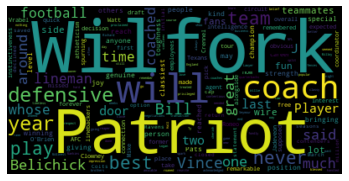

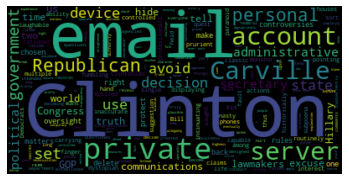

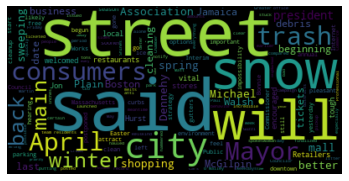

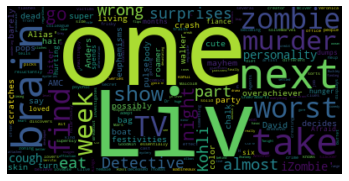

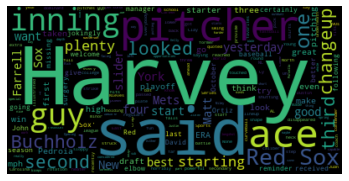

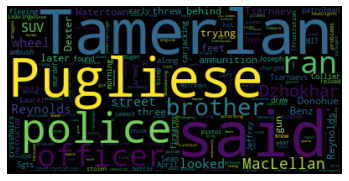

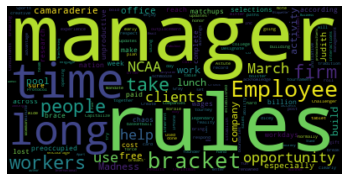

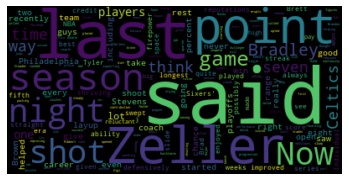

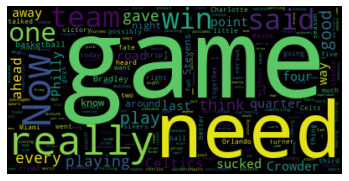

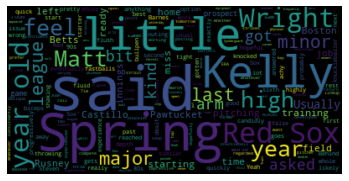

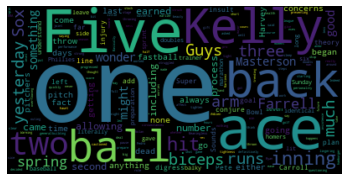

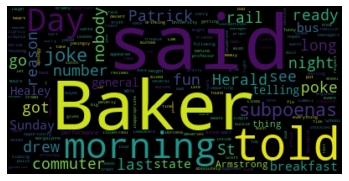

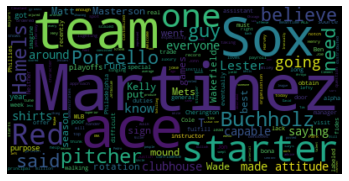

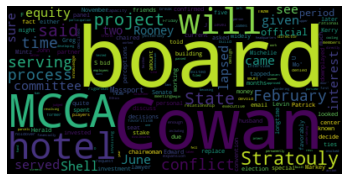

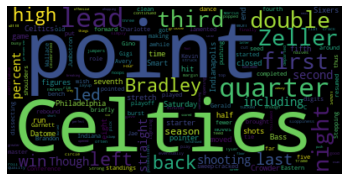

In [42]:
#filter the df to one candidate, and create a list of responses from them
import warnings
warnings.filterwarnings('ignore')

for i in df.body.values:
    text = i

    # join the list and lowercase all the words
    #text = ' '.join([text]).lower()

    #create the wordcloud object
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          collocations=True).generate(text)

    #plot the wordcloud object
    plt.imshow(wordcloud, interpolation='bilInear')
    plt.axis('off')
    plt.show()

In [50]:

def topic_distribution(string_input):
    string_input = [string_input]
    # Fit and transform
    X = vect.transform(string_input)
    # Convert sparse matrix to gensim corpus.
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    output = list(ldamodel[corpus])[0]
    return output
 
topic_distribution(documents.body[1])

([(0, 0.99632967)],
 [(11, [0]),
  (13, [0]),
  (15, [0]),
  (16, [0]),
  (17, [0]),
  (35, [0]),
  (45, [0]),
  (51, [0]),
  (60, [0]),
  (65, [0]),
  (95, [0]),
  (139, [0]),
  (140, [0]),
  (147, [0]),
  (148, [0]),
  (160, [0]),
  (197, [0]),
  (199, [0]),
  (203, [0]),
  (220, [0]),
  (229, [0]),
  (235, [0]),
  (265, [0]),
  (273, [0]),
  (281, [0]),
  (289, [0]),
  (290, [0]),
  (306, [0]),
  (307, [0]),
  (308, [0]),
  (311, [0]),
  (312, [0]),
  (313, [0]),
  (319, [0]),
  (357, [0]),
  (365, [0]),
  (366, [0]),
  (377, [0]),
  (387, [0]),
  (402, [0]),
  (427, [0]),
  (439, [0]),
  (441, [0]),
  (442, [0]),
  (503, [0]),
  (510, [0]),
  (545, [0]),
  (548, [0]),
  (552, [0]),
  (573, [0]),
  (583, [0]),
  (600, [0]),
  (602, [0]),
  (620, [0]),
  (659, [0]),
  (661, [0]),
  (664, [0]),
  (672, [0]),
  (683, [0]),
  (686, [0]),
  (693, [0]),
  (702, [0]),
  (705, [0]),
  (719, [0]),
  (734, [0]),
  (738, [0]),
  (746, [0]),
  (749, [0]),
  (821, [0]),
  (837, [0]),
  (848, [0]

## Second Approach to topic modeling using PAM

In [48]:
import tomotopy as tp
mdl = tp.PAModel(k1=5, k2=25)
for docs in df.content.values:
    mdl.add_doc(docs)
mdl.train(1000)

# first, infer the document
doc_inst = mdl.make_doc(df.content.values[0])
mdl.infer(doc_inst)

# next, count subtopics
subtopic_counts = [0] * mdl.k2
for t in doc_inst.subtopics:
    subtopic_counts[t] += 1

# estimate distribution
total = sum(subtopic_counts)
for i in range(mdl.k2):
    print('Subtopic #{} : {}'.format(i, subtopic_counts[i] / total))


Subtopic #0 : 0.0029917726252804786
Subtopic #1 : 0.0
Subtopic #2 : 0.008227374719521317
Subtopic #3 : 0.01944652206432311
Subtopic #4 : 0.09199700822737472
Subtopic #5 : 0.008227374719521317
Subtopic #6 : 0.02617801047120419
Subtopic #7 : 0.016454749439042633
Subtopic #8 : 0.02019446522064323
Subtopic #9 : 0.005235602094240838
Subtopic #10 : 0.002243829468960359
Subtopic #11 : 0.10022438294689603
Subtopic #12 : 0.07329842931937172
Subtopic #13 : 0.0
Subtopic #14 : 0.09424083769633508
Subtopic #15 : 0.009723261032161555
Subtopic #16 : 0.020942408376963352
Subtopic #17 : 0.14285714285714285
Subtopic #18 : 0.04786836200448766
Subtopic #19 : 0.010471204188481676
Subtopic #20 : 0.044128646222887064
Subtopic #21 : 0.08975317875841436
Subtopic #22 : 0.13986537023186238
Subtopic #23 : 0.0014958863126402393
Subtopic #24 : 0.02393418100224383


/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-9a8c7e578906>:4: RuntimeWarning: `words` should be an iterable of str.
  mdl.add_doc(docs)
<ipython-input-48-9a8c7e578906>:8: RuntimeWarning: `words` should be an iterable of str.
  doc_inst = mdl.make_doc(df.content.values[0])


In [39]:
print(df.content.values[0])

Top chefs bring the heat  It may not have been as intense as 'Hell's Kitchen,' but competing chefs at yesterday's Greater Boston Culinary Cook-Off certainly  brought their A game, heating things up on theNew England Food Show's main stage. Chefs Jason Bond of Bondir, Bill Brodsky of Boston Nightlife Ventures and David Ladner of Rialto were given local scallops and New Zealand lamb as the main ingredients to create an appetizer and entree with.  Judges Scott Kearnan (Zagat), Henry Santoro (Radio BDC) and myself were tasked with awarding points for taste, presentation and creativity, and the gorgeous emcee Jenny Johnson chatted up us, the audience and chefs with her signature, fun-loving banter. Students from Le Cordon Bleu served dishes (prepped by the celeb chefs and their trusty sous chefs) to judges and a three-person panel of lucky audience members who scored their special seat by answering food-related trivia questions. Each dish was spectacular, but in the end, Bond's perfect pres

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
